### Please use the following link to try out the OMERO Python language bindings
https://docs.openmicroscopy.org/latest/omero/developers/Python.html

### Import Packages required to connect to OMERO

In [25]:
from omero.gateway import BlitzGateway

### Create a connection to an OMERO server

In [70]:
import config

HOST = 'omero.mri.cnrs.fr'
PORT = 4064
USERNAME = config.USERNAME
PASSWORD = config.PASSWORD
conn = BlitzGateway(USERNAME, PASSWORD, host=HOST, port=PORT)
conn.connect()

# Using secure connection.
# By default, once we have logged in, data transfer is not encrypted
# (faster)
# To use a secured connection, call setSecure(True):
conn.setSecure(True)

### Read Data method

In [3]:
def print_obj(obj, indent=0):
    """
    Helper method to display info about OMERO objects.
    Not all objects will have a "name" or owner field.
    """
    print """%s%s:%s  Name:"%s" (owner=%s)""" % (
        " " * indent,
        obj.OMERO_CLASS,
        obj.getId(),
        obj.getName(),
        obj.getOwnerOmeName())

### Get Projects/Datasets/Images of the current User

In [4]:
my_exp_id = conn.getUser().getId()
default_group_id = conn.getEventContext().groupId
for project in conn.getObjects("Project", opts={'owner': my_exp_id,
                                            'group': default_group_id,
                                            'order_by': 'lower(obj.name)',
                                            'limit': 5, 'offset': 0}):
    print_obj(project)
    # We can get Datasets with listChildren, since we have the Project already.
    # Or conn.getObjects("Dataset", opts={'project', id}) if we have Project ID
    for dataset in project.listChildren():
        print_obj(dataset, 2)
        for image in dataset.listChildren():
            print_obj(image, 4)

Project:2232  Name:"cellprofiler" (owner=cedrichk)
  Dataset:3985  Name:"cellprofiler" (owner=cedrichk)
    Image:441563  Name:"AS_09125_050116030001_D03f00d0.tiff" (owner=cedrichk)
    Image:441564  Name:"AS_09125_050116030001_D03f00d1.tiff" (owner=cedrichk)
    Image:441565  Name:"AS_09125_050116030001_D03f00d2.tiff" (owner=cedrichk)


### Retrieve image by ID

In [5]:
# Pixels and Channels will be loaded automatically as needed
ids = [441563, 441564, 441565]
for images in ids:
    image = conn.getObject("Image", images)
    print image.getName()
    print " X:", image.getSizeX()
    print " Y:", image.getSizeY()
    print " Z:", image.getSizeZ()
    print " C:", image.getSizeC()
    print " T:", image.getSizeT()
# List Channels (loads the Rendering settings to get channel colors)
for channel in image.getChannels():
    print 'Channel:', channel.getLabel(),
    print 'Color:', channel.getColor().getRGB()

AS_09125_050116030001_D03f00d0.tiff
 X: 512
 Y: 512
 Z: 1
 C: 1
 T: 1
AS_09125_050116030001_D03f00d1.tiff
 X: 512
 Y: 512
 Z: 1
 C: 1
 T: 1
AS_09125_050116030001_D03f00d2.tiff
 X: 512
 Y: 512
 Z: 1
 C: 1
 T: 1
Channel: 0 Color: (128, 128, 128)


### Merge image Channels

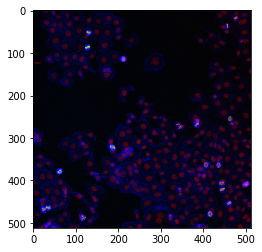

In [95]:
from skimage import data
from skimage import color
from skimage import img_as_float
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_d0 = conn.getObject("Image", 441563)
image_d1 = conn.getObject("Image", 441564)
image_d2 = conn.getObject("Image", 441565)

rendered_image_d0 = image_d0.renderImage(0, 0)
rendered_image_d1 = image_d1.renderImage(0, 0)
rendered_image_d2 = image_d2.renderImage(0, 0)

d0 = color.gray2rgb(img_as_float(rendered_image_d0))
rgb_d0 = color.gray2rgb(d0)
red_multiplier = [1, 0, 0]
red_d0 = rgb_d0 * red_multiplier

d1 = color.gray2rgb(img_as_float(rendered_image_d1))
rgb_d1 = color.gray2rgb(d1)
green_multiplier = [0, 1, 0]
green_d1 = rgb_d1 * green_multiplier

d2 = color.gray2rgb(img_as_float(rendered_image_d2))
rgb_d2 = color.gray2rgb(d2)
blue_multiplier = [0, 0, 1]
blue_d2 = rgb_d2 * blue_multiplier
plt.imshow(red_d0+green_d1+blue_d2)
plt.show()

<br>
#### When you are completely finished running the notebook close the connection to OMERO server

In [ ]:
conn.close()